<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Проверка-корректности-расчета-эффективности-обогащения" data-toc-modified-id="Проверка-корректности-расчета-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка корректности расчета эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-изменения-концентрации-металлов-на-разных-стадиях-очистки" data-toc-modified-id="Исследование-изменения-концентрации-металлов-на-разных-стадиях-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование изменения концентрации металлов на разных стадиях очистки</a></span></li><li><span><a href="#Исследование-распределения-размеров-гранул-сырья" data-toc-modified-id="Исследование-распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование распределения размеров гранул сырья</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-sMAPE" data-toc-modified-id="Функция-для-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-наилучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-наилучшей-модели-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка наилучшей модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Обзор данных

Импортируем необходимые для выполнения проекта библиотеки и функции:

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt 
import seaborn as sns

from collections import defaultdict
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

Загрузим датасеты:

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Теперь последовательно посмотрим на каждый из них. Вызовем функцию:

In [3]:
def explanations(df):
    display(df.head())
    print('Всего пропусков:', df.isna().mean().mean())
    print('Всего дубликатов:', df.duplicated().sum())
    display(df.describe())
    df.info()

In [4]:
explanations(df_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Всего пропусков: 0.0026496088855618486
Всего дубликатов: 0


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

In [5]:
explanations(df_train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Всего пропусков: 0.003330725618885377
Всего дубликатов: 0


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [6]:
explanations(df_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Всего пропусков: 0.0003210043870599565
Всего дубликатов: 0


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

Количество столбцов в тестовой и тренировочной выборках отличаются. Необходимо будет в этом разобраться.

В данных есть пропуски, однако их количество мало. 

Тип данных в столбце **date** - object. Впоследствии необходимо перевести его во временной формат. В остальных столбцах тип данных корректен.

### Проверка корректности расчета эффективности обогащения

Прежде, чем приступать к исследованию, необходимо удостовериться в том, что расчет эффективности обогащения произведен корректно. Для этого на обучающей выборке рассчитаем таковую для признака **rougher.output.recovery** и найдем MAE между полученными нами значениями и значениями модели:

In [7]:
def recovery_func(df):
    c = df['rougher.output.concentrate_au'] #доля золота в концентрате после флотации/очистки
    f = df['rougher.input.feed_au'] #доля золота в сырье/концентрате до флотации/очистки
    t = df['rougher.output.tail_au'] #доля золота в отвальных хвостах после флотации/очистки
    tabular_recovery = df['rougher.output.recovery']
    our_recovery =  (c*(f-t))/(f*(c-t))*100
    return mean_absolute_error(tabular_recovery, our_recovery)

print(recovery_func(df_train))

9.682896147825551e-15


Значение MAE стремится к нулю, что свидетельствует о корректности расчета эффективного обогащения.

### Анализ признаков, недоступных в тестовой выборке

In [8]:
def diffence(df1,df2):
    columns = []
    for column in df1.columns:
        if column not in df2.columns:
            columns.append(column)
    print(f'В тестовой выборке отсутствует {len(columns)} столбца')
    return columns

diffence(df_full,df_test)

В тестовой выборке отсутствует 34 столбца


['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

* В тестовой выборке нет признаков, относящихся к параметрам продукта (rougher).
* Также для этапа rougher отсутствует параметры calculation: возможно, они не доступны изначально и рассчитываются позже.
* Для этапов rougher и final отсутствуют целевые признаки - **output.recovery**, которые нам необходимо добавить к тестовой выборке

In [9]:
# поскольку в тестовой выборке нет пропусков в столбце date и значения в нем уникальны, то объединим именно по нему
df_test = df_test.merge(df_full[['date','final.output.recovery','rougher.output.recovery']], on='date')
display(df_test.head())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393,87.360133
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078,83.236367


In [10]:
test_columns = df_test.columns.to_list()
df_full_new = df_full[test_columns] #создадим новые датафреймы, в которых будут только те столбцы, что и в тестовом
df_train_new = df_train[test_columns] #они пригодятся нам при переходе к машинному обучению
display(df_full_new.head())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,70.541216,87.107763
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,69.266198,86.843261
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,68.116445,86.842308
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,68.347543,87.226430
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,66.927016,86.688794


### Предобработка данных

В датафреймах имеются пропуски, от которых необходимо избавиться. Нам известно, что данные индексируются датой и временем получения информации, и соседние параметры часто оказываются похожими. Учтем это, предварительно удалив строки с пропусками в целевых признаках (их мы заменить на что-то примерное не можем):

In [11]:
for df in (df_full_new, df_full, df_train_new, df_train, df_test):
    df.dropna(subset=['rougher.output.recovery','final.output.recovery'], inplace=True)
    df.fillna(method = 'ffill', inplace=True) #распространение последнего действительного наблюдения вперед к следующему действительному обратному заполнению
    print(f'Пропусков в датафрейме: {df.isna().sum().sum()}')

Пропусков в датафрейме: 0
Пропусков в датафрейме: 0
Пропусков в датафрейме: 0
Пропусков в датафрейме: 0
Пропусков в датафрейме: 0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


Для последующего машинного обучения столбец date будет проблемой. Поскольку в числовой формат перевести его мы удалим, но сделаем это уже непосредственно перед процессом, а пока переведем тип данных  в datetime.

In [12]:
#for df in (df_full_new, df_full, df_train_new, df_train, df_test):
#    df.drop('date',axis =1)
for df in (df_full_new, df_full, df_train_new, df_train, df_test):
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M:%S')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Анализ данных

### Исследование изменения концентрации металлов на разных стадиях очистки

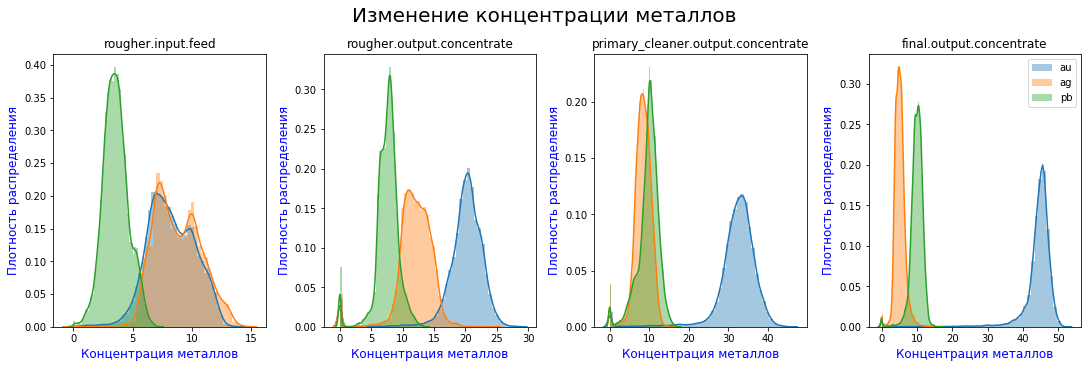

In [13]:
stages = ['rougher.input.feed',
           'rougher.output.concentrate',
           'primary_cleaner.output.concentrate',
           'final.output.concentrate']

metals = ['au', 'ag', 'pb']

fig, axs = plt.subplots(1, len(stages), figsize=(15, 5), constrained_layout=True)
fig.suptitle('Изменение концентрации металлов', fontsize=20)

for stage, ax in zip(stages, axs):
    ax.set_xlabel("Концентрация металлов", fontsize=12, color='blue')
    ax.set_ylabel("Плотность распределения", fontsize=12, color='blue')
    ax.set_title(stage)
    for metal in metals:        
        cols = df_full.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(df_full.loc[:, cols].dropna(), label=metal, ax=ax) 
        
plt.legend()
plt.show()

Ожидаемо, с каждым последующим этапом концентрация золота заметно повышается. Концентрация серебра не столь значительно убывает, а свинца - возрастает

### Исследование распределения размеров гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках:

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


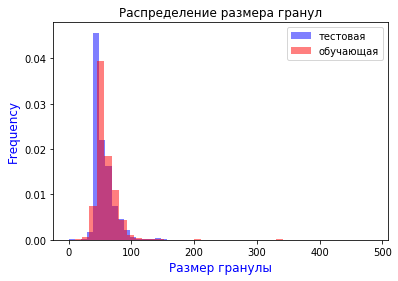

In [14]:
ax = plt.gca()
ax.set_xlabel("Размер гранулы", fontsize=12, color='blue')
ax.set_ylabel("Плотность распределения", fontsize=12, color='blue')
df_test['rougher.input.feed_size'].plot(kind='hist', bins=40, color = 'blue', alpha=0.5, label='тестовая', legend=True, normed=True)
df_train_new['rougher.input.feed_size'].plot(kind='hist', bins=40, title = 'Распределение размера гранул', color = 'red', alpha=0.5, label='обучающая', legend=True, normed=True)

Внешне распределения не сильно отличаются друг от друга, следовательно значения размера гранул в тестовой и обучающей выборках схожи.

### Исследование суммарной концентрации всех веществ на разных стадиях

Создадим функцию для суммирования концентрации веществ на каждом этапе:

In [15]:
def concentration(row):
    date = row['date']
    input_au = row["rougher.input.feed_au"]
    input_ag = row["rougher.input.feed_ag"]
    input_pb = row["rougher.input.feed_pb"]
    input_sol = row["rougher.input.feed_sol"]
    stages = ['rougher', 'final'] 
    materials = ['au', 'ag', 'pb', 'sol'] 
    rougher = []
    final = []
    arrays =[rougher, final]
    for stage,array in zip(stages,arrays):
        for material in materials:
            array.append(row[f'{stage}.output.concentrate_{material}'])
    sum_input = input_au + input_ag + input_pb + input_sol #в сырье
    sum_rougher = sum(rougher) #в черновом концентрате
    sum_final = sum(final) #в финальном концентрате
    return pd.Series([date, sum_input,sum_rougher,sum_final])

In [16]:
concentrations = df_full.apply(concentration, axis=1)
concentrations.columns = ['date','input', 'rougher', 'final']
display(concentrations)

,date,input,rougher,final
0,2016-01-15 00:00:00,51.680034,66.424950,63.644396
1,2016-01-15 01:00:00,50.659114,67.012710,63.957723
2,2016-01-15 02:00:00,50.609929,66.103793,64.311180
3,2016-01-15 03:00:00,51.061546,65.752751,63.573449
4,2016-01-15 04:00:00,47.859163,65.908382,64.004667
...,...,...,...,...
19434,2018-08-18 06:59:59,53.415050,70.781325,68.098589
19435,2018-08-18 07:59:59,53.696482,70.539603,68.274362
19436,2018-08-18 08:59:59,54.589604,55.376330,68.226068
19437,2018-08-18 09:59:59,54.027355,69.201689,68.200449


Построим гистограммы:

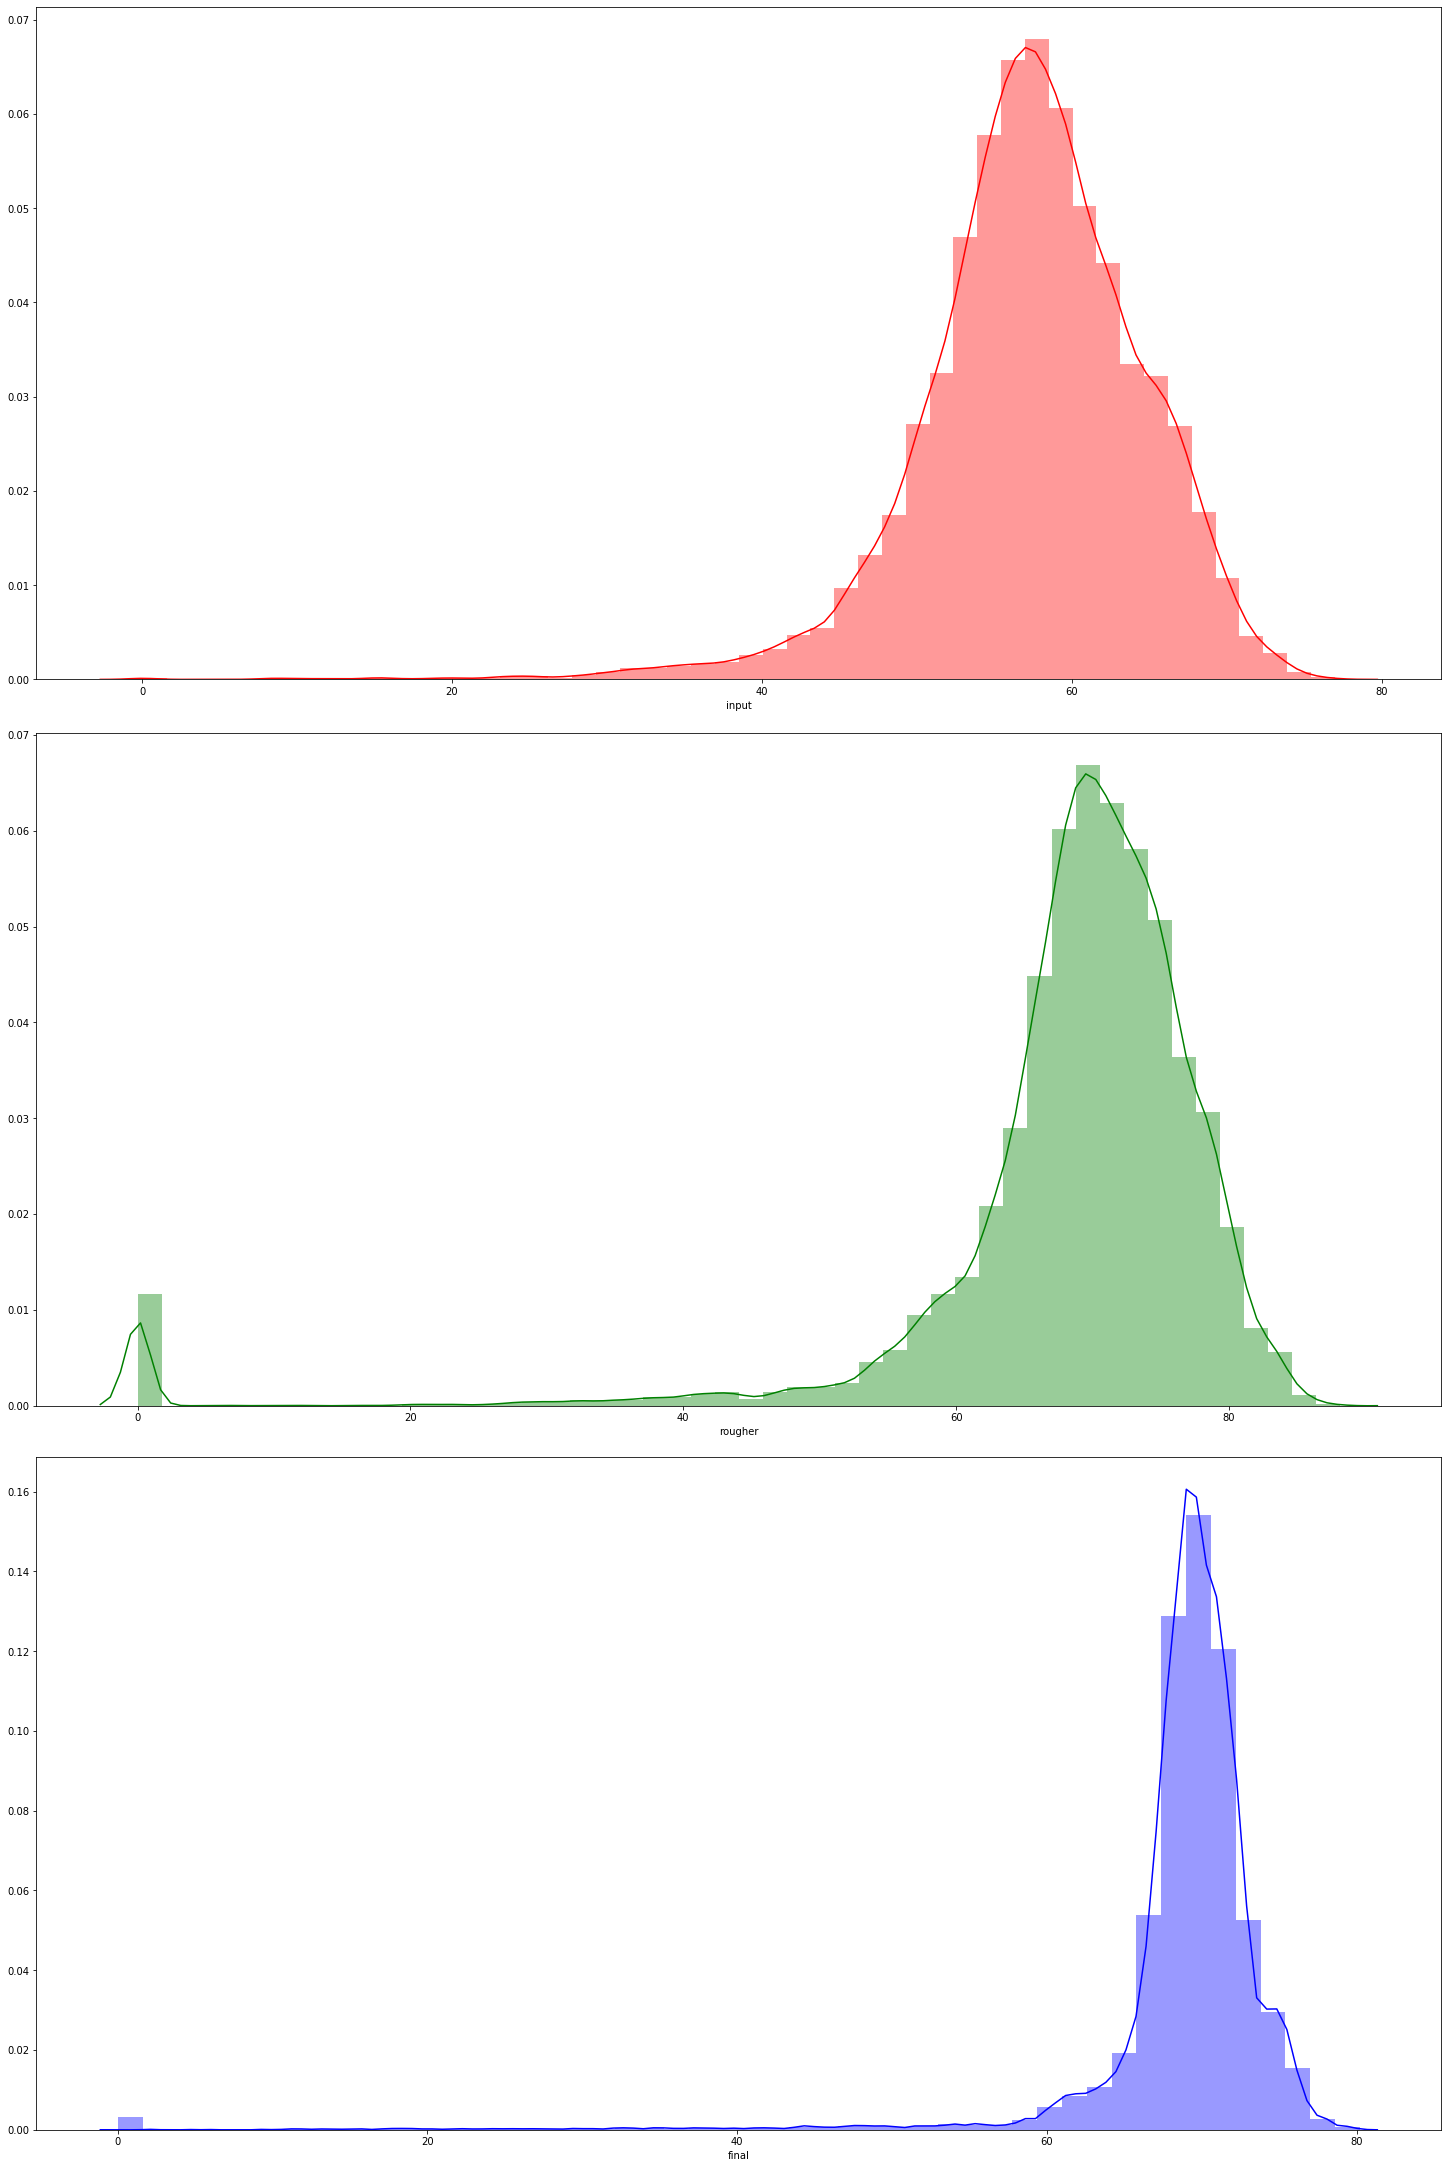

In [17]:
fig, axs = plt.subplots(3,1,figsize = (20,30), constrained_layout=True)
sns.distplot(concentrations['input'], color="red", ax = axs[0])
sns.distplot(concentrations['rougher'], color="green", ax = axs[1])
sns.distplot(concentrations['final'], color="blue", ax = axs[2])

На гистограммах можно заметить (для rougher и final) небольшой пик около нулевого значения - это выбросы. От них необходимо избавиться, поскольку при обучении модели они внесут ошибки.

In [18]:
 #установим пороги, ниже которых значение будет считаться выбросом
concentrations = concentrations[(concentrations['input'] > 10) & 
                                (concentrations['rougher'] > 10) & 
                                (concentrations['final'] > 10)]

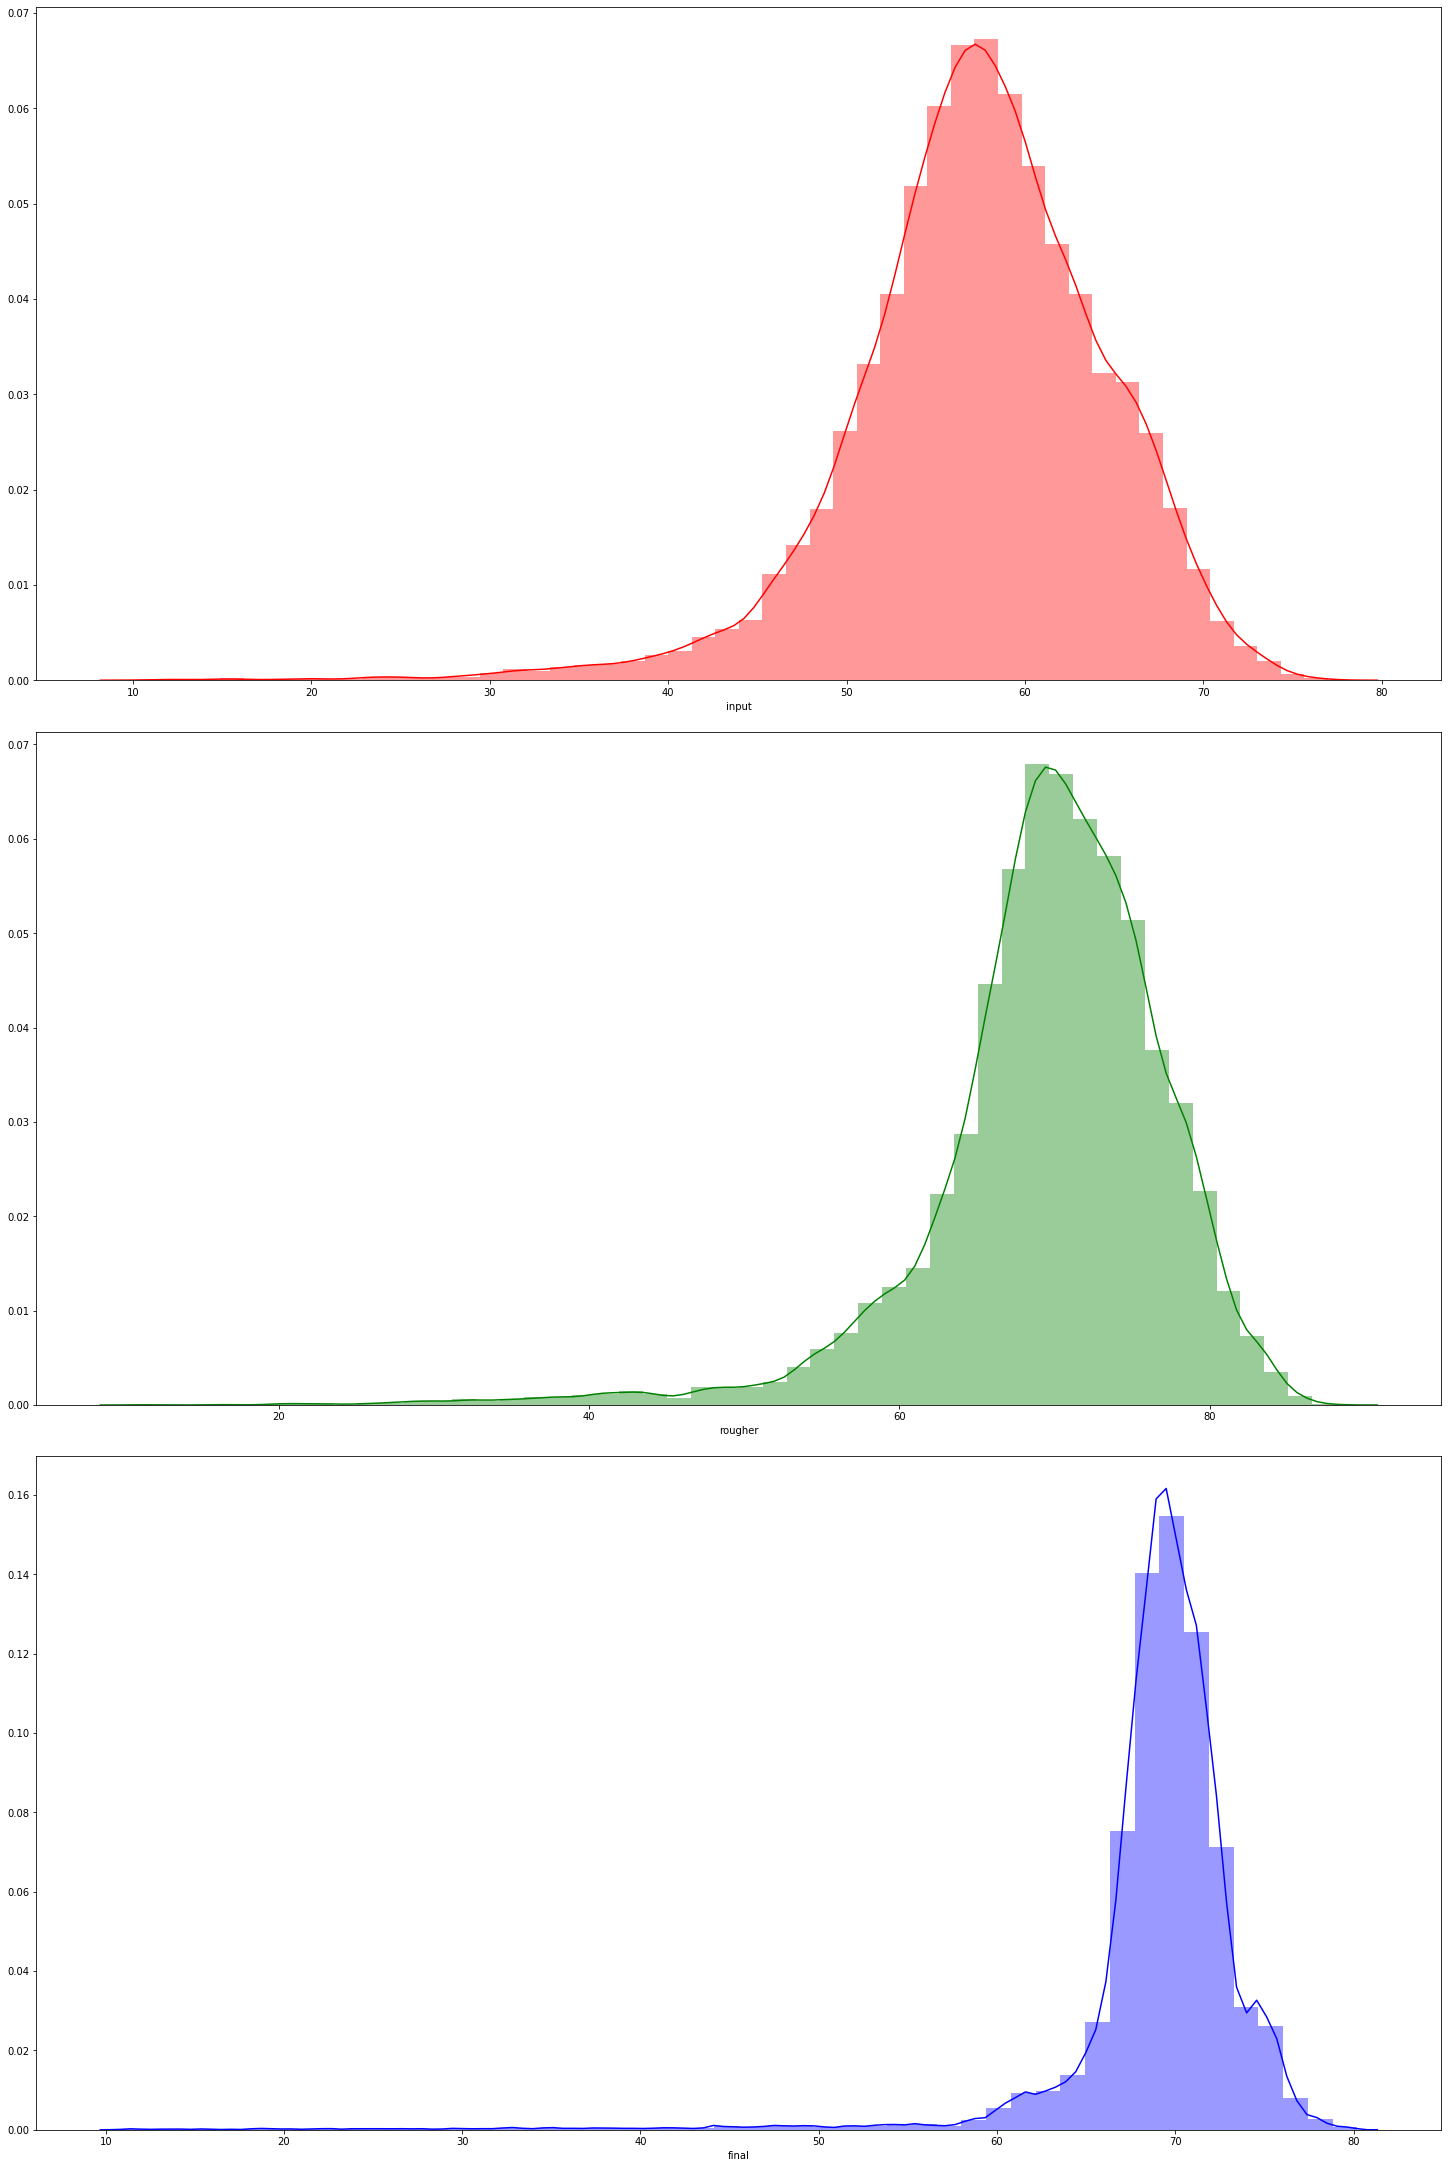

In [19]:
fig, axs = plt.subplots(3,1,figsize = (20,30), constrained_layout=True)
sns.distplot(concentrations['input'], color="red", ax = axs[0])
sns.distplot(concentrations['rougher'], color="green", ax = axs[1])
sns.distplot(concentrations['final'], color="blue", ax = axs[2])

Мы удалили выбросы из датафрейма concentrations. Далее зададим функцию, которая позволит удалить их из "рабочих" датафреймов:

In [20]:
def del_it(df, df2):
    rap = df2['date']
    df = df.query('date in @rap') #дата в роли уникального id. Если ее нет в датафрейме без выбросов, то строку удалим из нашего
    return df

In [21]:
df_full = del_it(df_full, concentrations)
df_full_new = del_it(df_full_new, concentrations)
df_train = del_it(df_train, concentrations)
df_train_new = del_it(df_train_new, concentrations)
df_test = del_it(df_test, concentrations)
print('Избавились от выбросов!')

Избавились от выбросов!


**ВЫВОД**

В результате анализа данных исследованы:
* изменения концентрации металлов на разных стадиях очистки - с каждым последующим этапом концентрация золота возрастает;
* распределения размеров гранул в обучающей и тестовой выборках - визуально они похожи
* суммарная концентрация всех веществ на разных стадиях - удалены выбросы

## Модель

### Функция для вычисления sMAPE

Перед переходом к машинному обучению необходимо удалить столбцы **date**, поскольку их формат не числовой:

In [22]:
def del_date(df):
    df.drop(df.columns[[0]], axis=1, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df
        
del_date(df_full_new)
del_date(df_train_new)
del_date(df_test)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393,87.360133
4,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078,83.236367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,-499.599127,...,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,68.919891,95.172585
5147,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,-503.587739,...,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,68.440582,94.575036
5148,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,-520.667442,...,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,67.092759,93.018138
5149,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,-487.479567,...,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284,68.061186,92.599042


Создадим функции для расчета sMAPE и итогового sMAPE:

In [23]:
def smape(y_true, y_pred):
    return (((abs(y_true - y_pred) * 200)/(abs(y_true) + abs(y_pred))).sum()) / len(y_true)

def smape_result(smape_rougher,smape_final):
    return (0.25*smape_rougher + 0.75*smape_final)

### Обучение моделей

In [24]:
train_features_rougher = df_train_new.drop( ['rougher.output.recovery', 'final.output.recovery'], axis=1)
train_target_rougher = df_train_new['rougher.output.recovery']
train_features_final = train_features_rougher
train_target_final = df_train_new['final.output.recovery']

scaler_rougher = StandardScaler() #произведем масштабирование признаков
train_features_rougher = scaler_rougher.fit_transform(train_features_rougher)

scaler_final = StandardScaler() 
train_features_final = scaler_final.fit_transform(train_features_final)

In [25]:
def get_cv_scores(model, target, features):
    smape_scorer = make_scorer(smape)
    
    scores = cross_val_score(model,
                             features,
                             target,
                             cv=5,
                             scoring=smape_scorer)
    
    return scores.mean()

**Обучим дерево решений:**

In [26]:
d = defaultdict(list)

for depth in range(2, 14):
    
    model_1 = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    model_2 = DecisionTreeRegressor(max_depth=depth, random_state=12345)

    rougher_smape = get_cv_scores(model_1, train_target_rougher, train_features_rougher)
    final_smape = get_cv_scores(model_2, train_target_final, train_features_final)
    d['rougher_smape_tree'].append(rougher_smape)
    d['final_smape_tree'].append(final_smape)
    d['smape_result_tree'].append(smape_result(rougher_smape, final_smape))
    d['depth_tree'].append(depth)

tree = pd.DataFrame(d).sort_values(by='smape_result_tree')
display(tree)

,rougher_smape_tree,final_smape_tree,smape_result_tree,depth_tree
1,7.100611,9.418860,8.839298,3
0,7.618112,9.355114,8.920863,2
2,7.413873,9.701186,9.129357,4
3,8.152955,10.564085,9.961303,5
4,8.530732,10.554142,10.048289,6
5,9.363899,11.338846,10.845109,7
6,9.185775,12.133715,11.396730,8
7,9.238007,12.381261,11.595448,9
8,10.465133,13.742607,12.923238,10
9,10.465538,13.831010,12.989642,11


Наилучшей среди моделей решающего дерева оказалась модель с глубиной, равной 3. Итоговый sMAPE = 8,84

**Обучим случайный лес:**

Конечно, правильнее было бы проверить одновременно параметры n_estimators и max_depth, но в таком случае обучение модели займет очень много времени, потому сделам допущение и примем max_depth=3:

In [27]:
f = defaultdict(list)

for est in range(1, 20):
    model_forest_1 = RandomForestRegressor(max_depth=3, n_estimators=est, random_state=12345)
    model_forest_2 = RandomForestRegressor(max_depth=3, n_estimators=est, random_state=12345)
        
    rougher_smape = get_cv_scores(model_forest_1, train_target_rougher, train_features_rougher)
    final_smape = get_cv_scores(model_forest_2, train_target_final, train_features_final)
    f['rougher_smape_forest'].append(rougher_smape)
    f['final_smape_forest'].append(final_smape)
    f['smape_result_forest'].append(smape_result(rougher_smape, final_smape))
    f['est_forest'].append(est)
        
        
forest = pd.DataFrame(f).sort_values(by='smape_result_forest')
display(forest.head())

,rougher_smape_forest,final_smape_forest,smape_result_forest,est_forest
12,6.733584,9.125278,8.527355,13
13,6.714114,9.138913,8.532713,14
11,6.746246,9.133510,8.536694,12
9,6.755285,9.133980,8.539306,10
14,6.720684,9.150297,8.542894,15


Наилучшей оказалась модель с количеством деревьев, равным 13. Итоговый sMAPE = 8,53.

**Обучим линейную регрессию:**

In [28]:
model_regression_1 = LinearRegression()
model_regression_2 = LinearRegression()

rougher_smape_regression = get_cv_scores(model_regression_1, train_target_rougher, train_features_rougher)
final_smape_regression = get_cv_scores(model_regression_2, train_target_final, train_features_final)
smape_result_regression = smape_result(rougher_smape_regression, final_smape_regression)

print(f'Итоговый sMAPE: {smape_result_regression}')
print(f'sMAPE(rougher): {rougher_smape_regression}')
print(f'sMAPE(final): {final_smape_regression}')

Итоговый sMAPE: 10.029544166382294
sMAPE(rougher): 7.227109063439043
sMAPE(final): 10.96368920069671


### Проверка наилучшей модели на тестовой выборке

Разобьем тестовую выборку на признаки и целевые признаки, а также произведем масштабирование:

In [29]:
test_features_rougher = df_test.drop( ['rougher.output.recovery', 'final.output.recovery'], axis=1)
test_target_rougher = df_test['rougher.output.recovery']

test_features_final = test_features_rougher
test_target_final = df_test['final.output.recovery']

test_features_rougher = scaler_rougher.transform(test_features_rougher)
test_features_final = scaler_final.transform(test_features_final)

Наилучшей моделью оказалась модель случайного леса с глубиной - 3 и количеством деревьев - 13. Проверим ее на тестовой выборке:

In [30]:
best_model_rougher = RandomForestRegressor(max_depth=3, n_estimators=13, random_state=12345)
best_model_final = RandomForestRegressor(max_depth=3, n_estimators=13, random_state=12345)
best_model_rougher.fit(train_features_rougher, train_target_rougher)
best_model_final.fit(train_features_final, train_target_final)

predictions_rougher = best_model_rougher.predict(test_features_rougher)
predictions_final = best_model_final.predict(test_features_final)

g = defaultdict(list) 
g['rougher_smape_test'].append(smape(test_target_rougher, predictions_rougher))
g['final_smape_test'].append(smape(test_target_final, predictions_final))
g['smape_result_test'].append(smape_result(smape(test_target_rougher, predictions_rougher), smape(test_target_final, predictions_final)))

pd.DataFrame(g)

,rougher_smape_test,final_smape_test,smape_result_test
0,4.939029,8.004752,7.238321


В результате проверки итоговый sMAPE оказался равен 7,24, что даже ниже полученного на обучающей выборке результата. Это свидетельствует о том, что модель выбрана верно. Осталось проверить ее на адекватность

### Проверка модели на адекватность

Обучим константную модель:

In [31]:
base_rougher = DummyRegressor(strategy="median")
base_final = DummyRegressor(strategy="median")

base_rougher_smape = get_cv_scores(base_rougher, train_target_rougher, train_features_rougher)
base_final_smape = get_cv_scores(base_final, train_target_final, train_features_final)
smape_result_base = smape_result(base_rougher_smape, base_final_smape)

print(f'Итоговый sMAPE: {smape_result_base}')
print(f'sMAPE(rougher): {base_rougher_smape}')
print(f'sMAPE(final): {base_final_smape}')

Итоговый sMAPE: 9.772078245129123
sMAPE(rougher): 7.792511820388509
sMAPE(final): 10.431933720042661


sMAPE нашей модели меньше, чем у константной. Таким образом, наша модель прошла проверку на адекватность

**Вывод**

Мы обучили модели решающего дерева, случайного леса и линейной регрессии. Наилучшей оказалась модель случайного леса (max_depth=3, n_estimators=13), которая также прошла проверку на адекватность.

# Вывод

В самом начале работы были произведены обзор данных и предобработка таковых. Также была осуществлена проверка коректности расчета целевого признака **rougher.output.recovery**, которая оказалось успешной.

Следом был произведен анализ данных, на основе которого получены следующие выводы:
* с каждым последующим этапом очистки концентрация золота возрастает; концентрация серебра не столь значительно убывает, а свинца - возрастает;
* распределения размеров гранул в обучающей и тестовой выборках визуально схожи;
* с помощью исследования суммарной концентрации всех веществ на разных стадиях из данных были удалены выбросы.

После были обучены модели решающего дерева, случайного леса и линейной регрессии, из которых выбрана лучшая - модель случайного леса (max_depth=3, n_estimators=13). Итоговый sMAPE наилучшей модели на обучающей выборке - 8.53, на тестовой - 7.24. Следом модель успешно прошла проверку на адекватность.